In [29]:
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist
import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)

In [30]:
X_train = open_images("train-images-idx3-ubyte.gz")

In [40]:
x_test = open_images("t10k-images-idx3-ubyte.gz")

In [31]:
x = X_train.reshape(60000, 784)

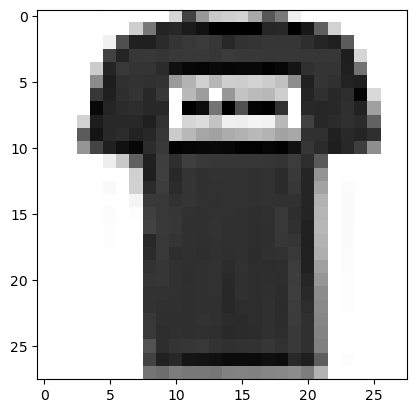

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X_train[1], cmap="gray_r")
plt.show()

In [33]:
y_train = open_labels("train-labels-idx1-ubyte.gz")

In [41]:
y_test = open_labels("t10k-labels-idx1-ubyte.gz")

In [34]:
y = y_train == 0 # if 0 than t-shirt

In [35]:
from keras.models import Sequential
from keras.layers import Dense

In [36]:
model = Sequential()

In [37]:
model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [38]:
model.fit(x, y, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 1s 4ms/step - loss: 0.2261 - accuracy: 0.9134
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.1635 - accuracy: 0.9392
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 0.1463 - accuracy: 0.9471
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.1362 - accuracy: 0.9512
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.1300 - accuracy: 0.9532
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.1255 - accuracy: 0.9536
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.1216 - accuracy: 0.9541
Epoch 8/10
60/60 [==============================] - 0s 4ms/step - loss: 0.1187 - accuracy: 0.9549
Epoch 9/10
60/60 [==============================] - 0s 4ms/step - loss: 0.1166 - accuracy: 0.9549
Epoch 10/10
60/60 [==============================] - 0s 4ms/step - loss: 0.1150 - accuracy: 0.9552


In [39]:
model.evaluate(x, y) # Gives accuracy from train data

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1135 - accuracy: 0.9561


[0.11350804567337036, 0.9560999870300293]

In [52]:
z = y_test == 0
model.evaluate(x_test.reshape(-1, 784), z) # Gives accuracy from test data

313/313 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.9527


[0.11908546090126038, 0.9527000188827515]

In [53]:
p = x[1].reshape(1, 784)
p.shape

(1, 784)

In [54]:
model.predict(p)

1/1 [==============================] - 0s 35ms/step


array([[0.85744554]], dtype=float32)

In [13]:
y_pred = model.predict(x)

1875/1875 [==============================] - 2s 836us/step


In [17]:
y_pred = np.round(y_pred).reshape(-1)

In [18]:
np.mean(y_pred == y) # Gives accuracy -> manually calculated

0.9536166666666667